## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

data = pd.read_csv('MSFT_2000.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

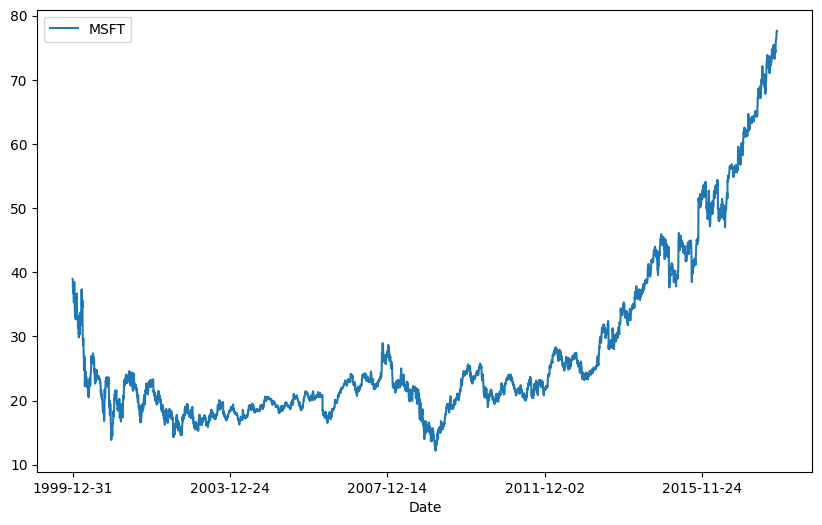

In [2]:
data.plot(figsize=(10,6));

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [3]:
so = data.iloc[-1]

so

MSFT    77.610001
Name: 2017-10-18, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [4]:
price_list = np.zeros_like(daily_returns)

price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
price_list[0] = so

price_list

array([[77.610001, 77.610001, 77.610001, ..., 77.610001, 77.610001,
        77.610001],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [7]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
    

In [8]:
price_list

array([[ 77.610001  ,  77.610001  ,  77.610001  , ...,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 79.86589159,  75.21354595,  77.45859996, ...,  76.23151955,
         78.27011854,  76.11469691],
       [ 77.34770606,  75.81065355,  78.46758483, ...,  76.29235551,
         79.59122446,  75.98560387],
       ...,
       [ 74.67375374, 141.0211831 ,  85.66144521, ...,  93.31803673,
         81.92495472, 164.57327562],
       [ 71.8565766 , 137.56703807,  82.47686225, ...,  95.06363027,
         79.4489226 , 167.98615796],
       [ 70.06546526, 138.5547046 ,  83.80403696, ...,  93.86720513,
         80.02894741, 166.2057424 ]])

Finally, plot the obtained price list data.

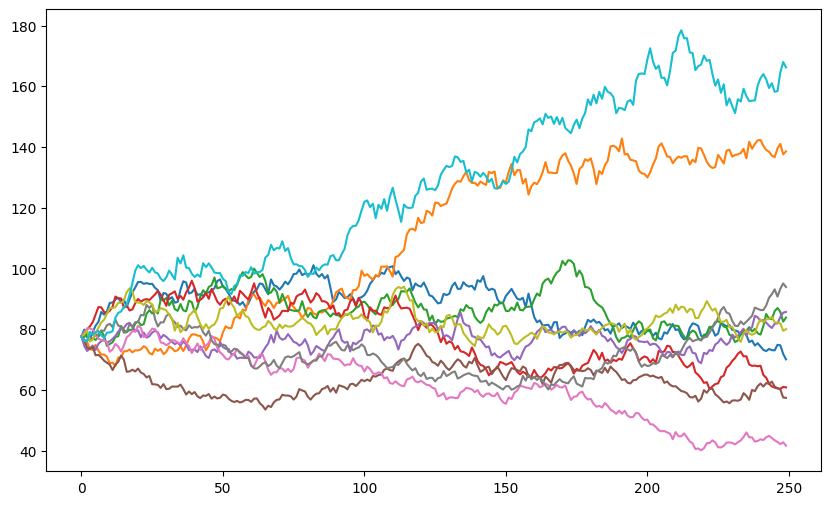

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);